In [131]:
'''
need to set up env variable before running notebook

terminal command: export PYSYN_CDBS = /Users/tchawla/research/HST_data/grp/redcat/trds
or: point towards correct directory. var name mys be PYSYN_CDBS
'''

import numpy as np
from astropy.io import ascii
from pylab import *
from astropy.table import Table, vstack
import pandas as pd
from expecto import get_spectrum
from scipy.interpolate import RegularGridInterpolator as rgi
from scipy.stats import binned_statistic as bin
from itertools import product
%run Interpolate_final_v2.ipynb
%run GetSpectra_final_v2.ipynb
%run Binning_final_v2.ipynb
%run AddNoise_final_v2.ipynb
import batman

In [2]:
water_array = [1.0, 1.5, 2.5, 3.5, 5.0]

'''
reads in .dat files. col1 is wavelength, col2 is transmission. Files are labeled with water content level in mm 
water content levels are listed in the array above. resolution is 200,000.
'''

d = {}
i=0
for n in water_array:
    water_content = str(water_array[i])
    d["data"+water_content] = ascii.read("transmission{0}_hi_res.dat".format(water_content))
    d["data"+water_content+"_pd"] = d["data"+water_content].to_pandas()
    #print(d["data"+water_content+"_pd"])
    i+=1

In [3]:
'''
for loop creates transmission values in shape necessary for interpolation function
'''
water_array = [1.0, 1.5, 2.5, 3.5, 5.0]

flux_array = []
i=0
for n in water_array:
    water_array_i = str(water_array[i])
    d["flux"+water_array_i] = np.array(d["data"+water_array_i+"_pd"]["col2"])
    flux_array.append(d["flux"+water_array_i])
    i+=1

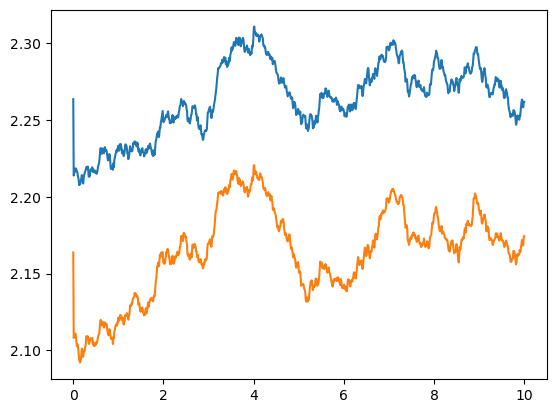

In [4]:
if __name__ == "__main__":

    timestamps = np.linspace(0,10,1000) #time in hours
    t, target_star_pwv, target_star_phase, target_star_mean = power_spectrum(12000, 1, 24000, timestamps, mean = 2)
    t1, comparison_star_pwv, _, _ = power_spectrum(12000, 1, 24000, timestamps, mean = target_star_mean, target = False, phase = target_star_phase, separation = 25)

    plt.plot(t, target_star_pwv)
    plt.plot(t, comparison_star_pwv)
    plt.show()


In [5]:
water_world_abs1 = ascii.read("water_world_abs1.dat")
water_world_abs2 = ascii.read("water_world_abs2.dat")
water_world_abs3 = ascii.read("water_world_abs3.dat")
water_world_abs4 = ascii.read("water_world_abs4.dat")

hot_jupiter_abs1 = ascii.read("hot_jupiter_abs1.dat")
hot_jupiter_abs2 = ascii.read("hot_jupiter_abs2.dat")
hot_jupiter_abs3 = ascii.read("hot_jupiter_abs3.dat")
hot_jupiter_abs4 = ascii.read("hot_jupiter_abs4.dat")

warm_jupiter_abs1 = ascii.read("warm_jupiter_abs1.dat")
warm_jupiter_abs2 = ascii.read("warm_jupiter_abs2.dat")
warm_jupiter_abs3 = ascii.read("warm_jupiter_abs3.dat")
warm_jupiter_abs4 = ascii.read("warm_jupiter_abs4.dat")

In [6]:
params_hot_jupiter = batman.TransitParams()       #object to store transit parameters
params_hot_jupiter.t0 = 0.                        #time of inferior conjunction
params_hot_jupiter.per = 4.7361                       #orbital period 

# assume rp of .07 for now
params_hot_jupiter.rp = 0.04644                       #planet radi`us (in units of stellar radii)
#at each wavelength, add transit depth for atm. Will alter rp parameter
#change in atm depth in ppm
#Depth is rp^2 (because it's in units of solar radii)
#As such, rp is sqrt of depth



params_hot_jupiter.a = 4.7361                        #semi-major axis (in units of stellar radii)
params_hot_jupiter.inc = 85.3                      #orbital inclination (in degrees)
params_hot_jupiter.ecc = 0.                       #eccentricity
params_hot_jupiter.w = 90.                        #longitude of periastron (in degrees)
params_hot_jupiter.limb_dark = "nonlinear"        #limb darkening model
params_hot_jupiter.u = [0.5, 0.1, 0.1, -0.1]      #limb darkening coefficients [u1, u2, u3, u4]

t = np.linspace(-0.5, 0.5, 1000)  #times at which to calculate light curve
model_hot_jupiter = batman.TransitModel(params_hot_jupiter, t)    #initializes model

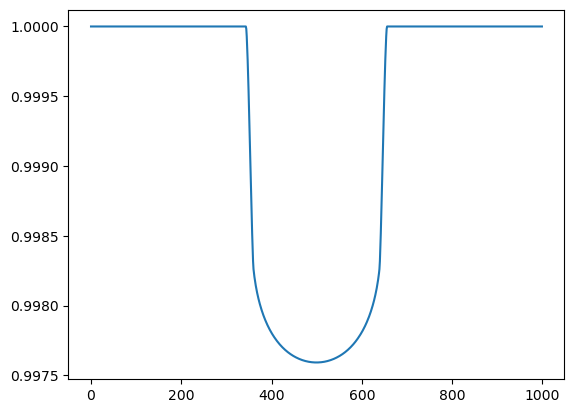

In [7]:

transit = model_hot_jupiter.light_curve(params_hot_jupiter)
plt.plot(transit)

In [8]:
params_warm_jupiter = batman.TransitParams()       #object to store transit parameters
params_warm_jupiter.t0 = 0.                        #time of inferior conjunction
params_warm_jupiter.per = 8.1587289                      #orbital period 

# assume rp of .07 for now
params_warm_jupiter.rp = 0.113                       #planet radi`us (in units of stellar radii)
#at each wavelength, add transit depth for atm. Will alter rp parameter
#change in atm depth in ppm
#Depth is rp^2 (because it's in units of solar radii)
#As such, rp is sqrt of depth



params_warm_jupiter.a = 18.2149                        #semi-major axis (in units of stellar radii)
params_warm_jupiter.inc = 88.55                      #orbital inclination (in degrees)
params_warm_jupiter.ecc = 0.                       #eccentricity
params_warm_jupiter.w = 90.                        #longitude of periastron (in degrees)
params_warm_jupiter.limb_dark = "nonlinear"        #limb darkening model
params_warm_jupiter.u = [0.5, 0.1, 0.1, -0.1]      #limb darkening coefficients [u1, u2, u3, u4]

t = np.linspace(-0.025, 0.025, 1000)  #times at which to calculate light curve
model_warm_jupiter = batman.TransitModel(params_warm_jupiter, t)    #initializes model

In [9]:
params_water_world = batman.TransitParams()       #object to store transit parameters
params_water_world.t0 = 0.                        #time of inferior conjunction
params_water_world.per = 5.7214742                      #orbital period 

# assume rp of .07 for now
params_water_world.rp = 0.14434                       #planet radi`us (in units of stellar radii)
#at each wavelength, add transit depth for atm. Will alter rp parameter
#change in atm depth in ppm
#Depth is rp^2 (because it's in units of solar radii)
#As such, rp is sqrt of depth



params_water_world.a = 18.164                        #semi-major axis (in units of stellar radii)
params_water_world.inc = 89.56                      #orbital inclination (in degrees)
params_water_world.ecc = 0.                       #eccentricity
params_water_world.w = 90.                        #longitude of periastron (in degrees)
params_water_world.limb_dark = "nonlinear"        #limb darkening model
params_water_world.u = [0.5, 0.1, 0.1, -0.1]      #limb darkening coefficients [u1, u2, u3, u4]

t = np.linspace(-0.025, 0.025, 1000)  #times at which to calculate light curve
model_water_world = batman.TransitModel(params_water_world, t)    #initializes model

In [10]:
target_spec = spectrum(4000, 8)
ref_spec = spectrum(5000, 9)

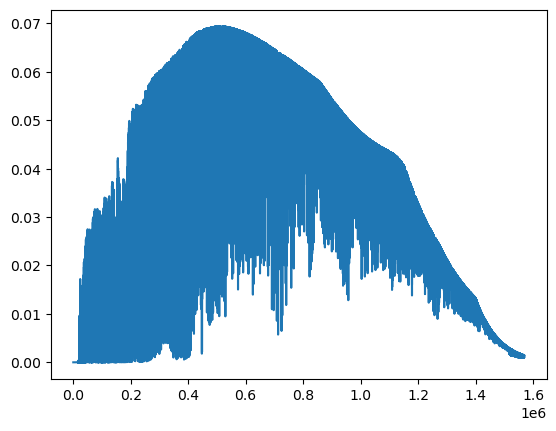

In [11]:
#target_spec[1][1000]
plt.plot(ref_spec[1])

In [12]:
spectrum = get_spectrum(5000, log_g=4.5, cache=False)

In [13]:
wave, flux = normalize_expecto_to_magnitude(spectrum.wavelength, spectrum.flux, 4)
np.max(flux)

6.938688900126053

In [14]:
def not_enough_photons(target_array, ref_array, atm, params):
    new_array1 = []
    bin_size_array = [target_array[1][1]-target_array[1][0]]
    
    t = np.linspace(-0.5, 0.5, 1000)
    bulk_transit_depth = params.rp**2
    #new_array2
    i=0
    for n in target_array[0][0]:
        if i >= len(atm["col5"]):
            break
        
        bin_size = target_array[1][i+1]-target_array[1][i]
        print(bin_size)
        bin_size_array.append(bin_size)
        target_array_i = np.array(target_array[0][:,i])
        print("original target array"+str(target_array_i[0:10]))
        
        #adding transit
        atm_transit_i = atm["col5"][i]/10**6
        #print("atm depth"+str(atm_transit_i))
        
        total_transit_depth = bulk_transit_depth + atm_transit_i
        rp_i = np.sqrt(total_transit_depth)
        params.rp = rp_i
        #print("rp"+str(params.rp))
        model = batman.TransitModel(params, t)
        transit = model.light_curve(params)
        #print("transit model"+str(transit[500:510]))
        
        #flux = stellar_flux_value*transmission
        transit_flux = transit*target_array_i
        #print("flux with transit"+str(transit_flux[0:10]))
        
        
        ref_array_i = np.array(ref_array[0][:,i])
        target_noise = photon_noise(transit_flux, bin_size)
        ref_noise = photon_noise(ref_array_i, bin_size)
        noisy_target_i = target_noise*transit_flux
        noisy_ref_i = ref_noise*ref_array_i
        divided_i = noisy_target_i/noisy_ref_i
        new_array1.append(divided_i)
        i+=1
        #if i == 3:
            #break
    return new_array1

#cold_star_abs1_test3[:,0]


In [15]:
photon_noise(flux, 90)


num photons:[28950497.15580125 27088335.48649626 25106972.8890208  23826694.51486474
 23905296.57413777 25522489.7477136  28243596.68986797 31005671.02317908
 32844946.92609248 33798968.27138522]
noise std dev:[0.00018585 0.00019214 0.00019957 0.00020487 0.00020453 0.00019794
 0.00018817 0.00017959 0.00017449 0.00017201]


array([-1.91600999e+17, -2.21250729e+17,  3.42005805e+17, ...,
        9.99522345e-01,  9.98821371e-01,  1.00027697e+00])

In [16]:
len(flux)

1569128

In [17]:
divided_hot_jupiter_abs1 = bin_divide(target_spec, ref_spec, target_star_pwv, comparison_star_pwv, .6, 1, hot_jupiter_abs1, params_hot_jupiter)

TypeError: bin_divide() missing 2 required positional arguments: 'atm' and 'rp'

In [ ]:
normalized_hot_jupiter_abs1 = normalize(divided_hot_jupiter_abs1)

In [ ]:
plt.plot(normalized_hot_jupiter_abs1[50]*10**6)

In [ ]:
photon = np.array([10**6, 10**5, 10**4, 10**3, 10**2, 10, 1])
target_noise = photon_noise(photon, 180)
target_noise

In [ ]:
#hot_jupiter_abs1

In [ ]:
%run Model.ipynb

time = arange(1, 1001, 1)

flux = normalized_hot_jupiter_abs1[0]

In [ ]:
transit_depth, std_dev_transit_depth, df = fit_lightcurve(time, transit*10**4)


In [ ]:
print(transit*10**4)

In [ ]:
len(time)

In [62]:
hi_res = spectrum(4000, 8)


In [30]:
hi_res[0]

array([  500.  ,   500.1 ,   500.2 , ..., 54999.25, 54999.5 , 54999.75])

In [90]:
integration_hi_res = np.trapz(hi_res[1], hi_res[0])

In [91]:
integration

2422.3592664023986

In [92]:
low_res = res_bin_timestamp(hi_res[1], hi_res[0], 200, 500, 54999.75)

In [93]:
len(low_res[0])

942

In [94]:
len(low_res[1])

943

In [95]:
integration_low_res = np.trapz(low_res[0], low_res[1][0:-1])

In [96]:
integration_low_res

217311.7861674213

In [105]:
'''
tweaked binning function that allows binning at every point in the pwv timeseries
'''

def res_bin_mean(flux, wavelength, res, wave_in, wave_fin, spectrum_type="stellar"):
    #print(wavelength)
    #print
    #print(flux)
    wave_in = wavelength[0]
    wave_fin = wavelength[-1]
    wave_array = [wave_in]
    n=wave_array[0]
    i=0
    #print(wave_in)
    #print(wave_fin)
    while wave_in <= n <= wave_fin:
        if wave_array[i] >= wave_fin:
            break
        bin_size = wave_array[i]/res
        if wave_array[i]+bin_size >= wave_fin:
            break
        wave_array.append(wave_array[i]+bin_size)
        n=wave_array[i]
        i+=1
    #print(wave_array)
    
    
        
    if spectrum_type == "stellar":
        
        wave_in_index = 0
        wave_out_index = -1
        
        '''
        use this section if using binning function individually and need to specify wave range
        wave_in_index = np.where(wavelength == wave_in*10)[0]
        print(wave_in_index)
        wave_out_index = np.where(wavelength == wave_fin*10)[0]
        print(wave_out_index)
        '''

        wavelength_range = wavelength[wave_in_index:wave_out_index]
        #print(wavelength_range)
        #finds step size of stellar spectrum
        
        high_res_step = [wavelength_range[1]-wavelength_range[0]]
        j=0
        for n in wavelength:
            if j == len(wavelength_range)-1:
                break
            bin_size2 = wavelength_range[j+1] - wavelength_range[j]
            high_res_step.append(bin_size2)
            j+=1
        
        #flux must be multiplied by fractional step size in order to scale it for binning
        #flux = (spectrum.flux.value)*high_res_step
        #flux_new = (flux[wave_in_index:wave_out_index])*high_res_step
        flux_new = (flux[wave_in_index:wave_out_index])
        #print(high_res_step)
        #print(len(flux_new))
        #print(len(wavelength_range))
        #print(len(flux_new))
        
        
    elif spectrum_type == "earth":
        wavelength = spectrum["col1"]
        flux = spectrum["col2"]
    
    #plt.hist(wavelength_range, bins=wave_array, weights=flux_new)
    #plt.show()
    #return np.histogram(wavelength_range, bins=wave_array, weights=flux_new)
    #return wavelength_range, flux
    return bin(wavelength_range, flux_new, bins=wave_array, statistic="mean")


In [106]:
low_res_mean = res_bin_mean(hi_res[1], hi_res[0], 200, 500, 54999.75)

In [110]:
#low_res_mean

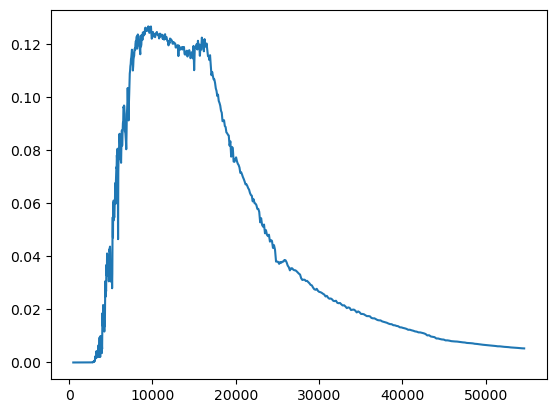

In [114]:
plt.plot(low_res_mean[1][0:-1], low_res_mean[0])

In [107]:
low_res_mean_integrated = np.trapz(low_res_mean[0], low_res_mean[1][0:-1])

In [108]:
low_res_mean_integrated

2414.9758168010917

In [71]:
len(low_res[0])

942

In [72]:
len(low_res[1])

943

In [48]:
len(low_res[0])

1569127

In [49]:
len(low_res[1])

1569128

In [50]:
len(hi_res[1])

1569128

In [51]:
len(hi_res[0])

1569128

In [52]:
hi_res

(array([  500.  ,   500.1 ,   500.2 , ..., 54999.25, 54999.5 , 54999.75]),
 array([5.68673093e-49, 5.82559174e-49, 5.96771615e-49, ...,
        5.37528316e-03, 5.39104009e-03, 5.30436568e-03]))

In [53]:
wave_range_test = hi_res[0][0:-1]

In [54]:
len(wave_range_test)

1569127

In [56]:
flux_range_test = hi_res[1][0:-1]

In [57]:
len(flux_range_test)

1569127

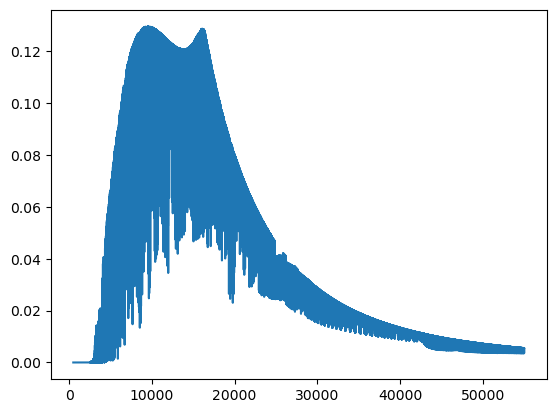

In [58]:
plt.plot(low_res[0], low_res[1][0:-1])

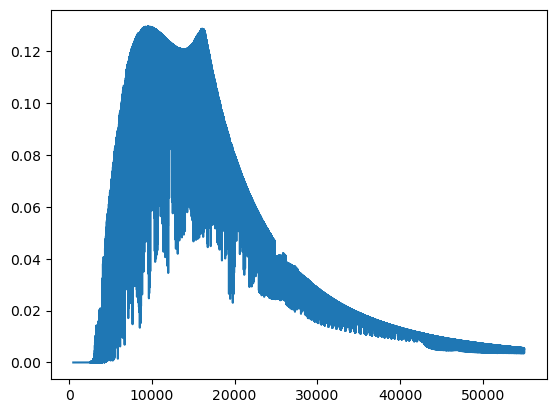

In [63]:
plt.plot(hi_res[0], hi_res[1])

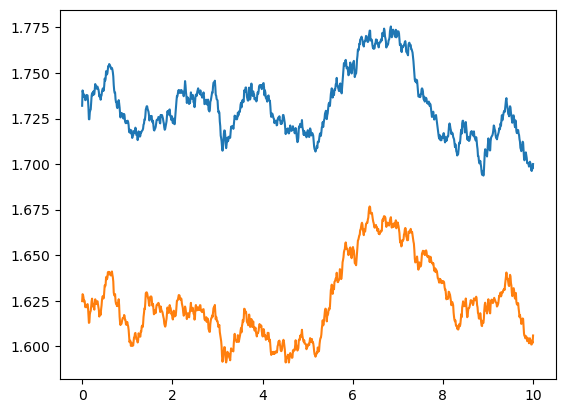

In [132]:
if __name__ == "__main__":

    timestamps = np.linspace(0,10,1000) #time in hours
    t, target_star_pwv, target_star_phase, target_star_mean = power_spectrum(12000, 1, 24000, timestamps, mean = 2)
    t1, comparison_star_pwv, _, _ = power_spectrum(12000, 1, 24000, timestamps, mean = target_star_mean, target = False, phase = target_star_phase, separation = 25)

    plt.plot(t, target_star_pwv)
    plt.plot(t, comparison_star_pwv)
    plt.show()


In [116]:
target_spec = spectrum(4000, 4)
ref_spec = spectrum(4500, 4)

In [133]:
params_hot_jupiter.rp = 0.04644
divided_hot_jupiter_abs3_25arc = bin_divide(target_spec, ref_spec, target_star_pwv, comparison_star_pwv, 1.25, 1.56, hot_jupiter_abs3, params_hot_jupiter)

bulk_transit_depth: 0.0021566736
bulk_rp: 0.04644


In [134]:
arcmin25 = normalize(divided_hot_jupiter_abs3_25arc)

In [135]:
len(arcmin25)

44

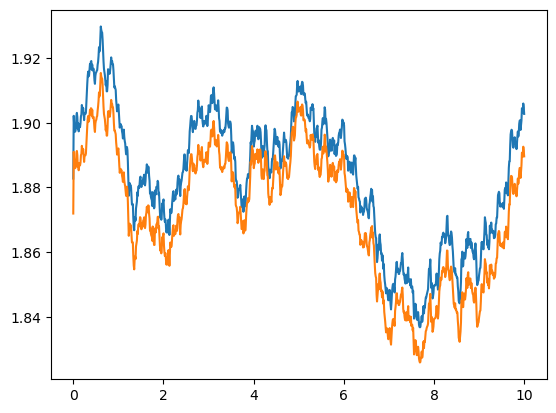

In [136]:
if __name__ == "__main__":

    timestamps = np.linspace(0,10,1000) #time in hours
    t, target_star_pwv, target_star_phase, target_star_mean = power_spectrum(12000, 1, 24000, timestamps, mean = 2)
    t1, comparison_star_pwv, _, _ = power_spectrum(12000, 1, 24000, timestamps, mean = target_star_mean, target = False, phase = target_star_phase, separation = 5)

    plt.plot(t, target_star_pwv)
    plt.plot(t, comparison_star_pwv)
    plt.show()


In [137]:
params_hot_jupiter.rp = 0.04644
divided_hot_jupiter_abs3_5arc = bin_divide(target_spec, ref_spec, target_star_pwv, comparison_star_pwv, 1.25, 1.56, hot_jupiter_abs3, params_hot_jupiter)

bulk_transit_depth: 0.0021566736
bulk_rp: 0.04644


In [138]:
arcmin5 = normalize(divided_hot_jupiter_abs3_5arc)

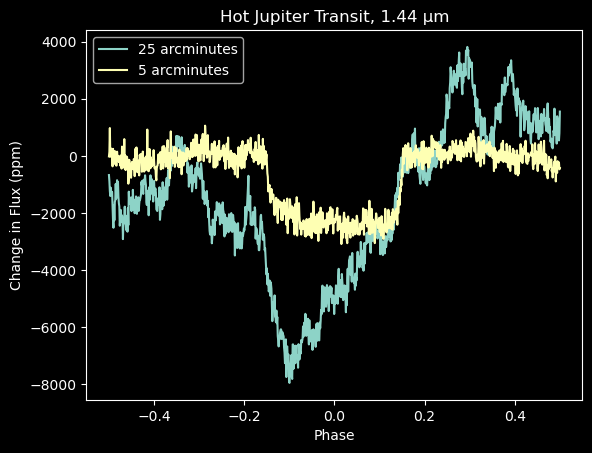

In [184]:

plt.style.use('dark_background')

t = np.linspace(-0.5, 0.5, 1000)  #times at which to calculate light curve
plt.plot(t, arcmin25[28]*10**6, label="25 arcminutes")
plt.plot(t, arcmin5[28]*10**6, label="5 arcminutes")

plt.ylabel("Change in Flux (ppm)")
plt.xlabel("Phase")
plt.title("Hot Jupiter Transit, 1.44 μm")

plt.legend()

plt.savefig("arcmin25and5.png")

0.001